In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('mall customers.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [8]:
df.tail()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

In [9]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [10]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.shape

(200, 5)

In [13]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
df.drop(['CustomerID', 'Gender'], axis=1, inplace=True)

In [15]:
df.head()

Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

In [16]:
df.rename(columns = {'Age':'age', 'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'score'},inplace = True)

In [17]:
df.head()

age  income  score
0   19      15     39
1   21      15     81
2   20      16      6
3   23      16     77
4   31      17     40

In [18]:
df.shape

(200, 3)

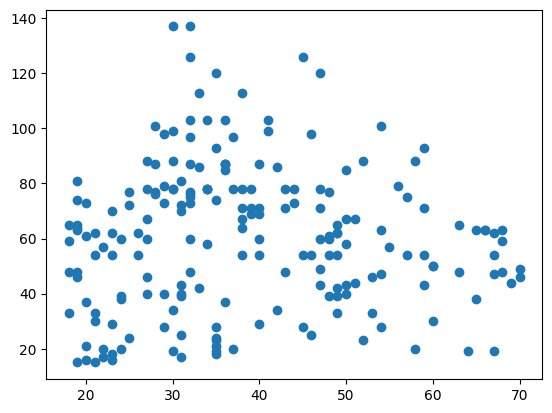

In [19]:
plt.scatter(df.age, df.income)

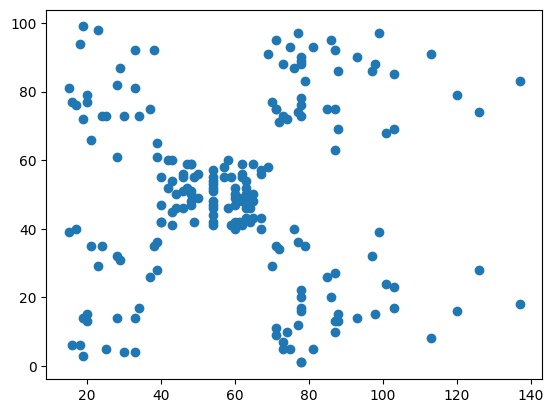

In [20]:
plt.scatter(df.income, df.score)

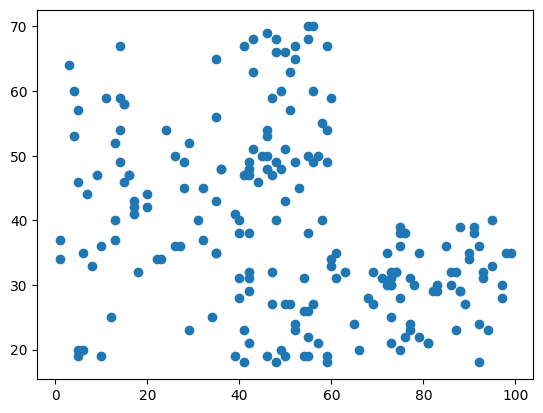

In [21]:
plt.scatter(df.score, df.age)  

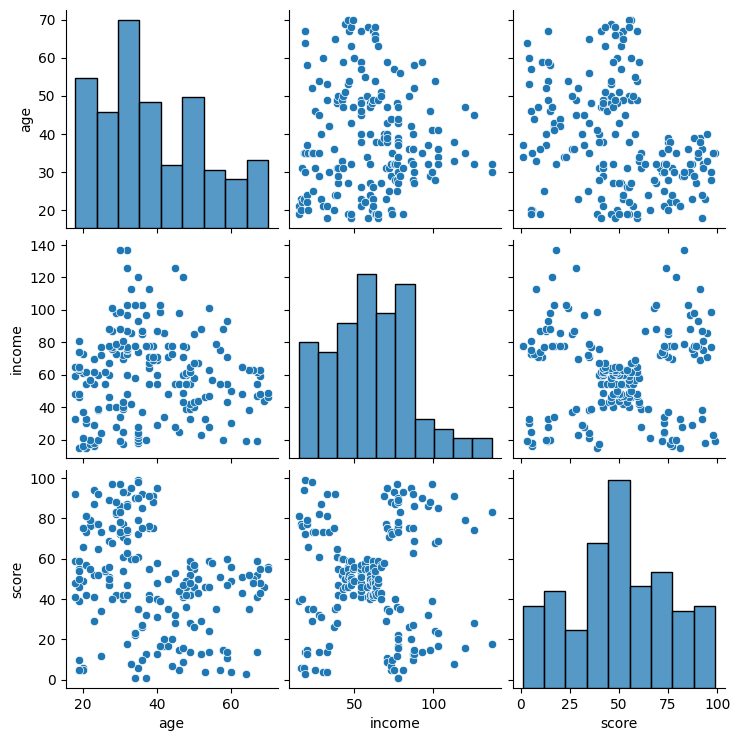

In [22]:
sns.pairplot(df[['age', 'income', 'score']])
plt.savefig('image.png')

# K-Means Cluster 

In [23]:
plt.scatter(df.score, df.income)
plt.xlabel('Score in 100')
plt.ylabel('income in $1000')

Text(0, 0.5, 'income in $1000')

In [24]:
from sklearn.cluster import KMeans

In [25]:
clust = KMeans()

In [26]:
clust.fit(df[['score', 'income']])

KMeans()

In [27]:
clust.predict(df[['score', 'income']])  # k value ta kon cluster a acay seta.

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 2, 7, 6, 7, 2, 7, 6, 7, 6,
       7, 6, 7, 2, 7, 6, 7, 6, 7, 2, 7, 2, 7, 2, 7, 6, 7, 2, 7, 2, 7, 6,
       7, 2, 7, 6, 7, 6, 7, 2, 7, 2, 7, 6, 7, 2, 7, 6, 7, 6, 7, 2, 7, 2,
       7, 6, 7, 2, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5])

In [28]:
df['defclusters'] = clust.predict(df[['score', 'income']])

In [29]:
df.head()

age  income  score  defclusters
0   19      15     39            4
1   21      15     81            3
2   20      16      6            4
3   23      16     77            3
4   31      17     40            4

In [30]:
centroid = clust.cluster_centers_
centroid

array([[ 49.74358974,  54.23076923],
       [ 22.        , 109.7       ],
       [ 90.46666667,  79.26666667],
       [ 79.36363636,  25.72727273],
       [ 20.22727273,  25.72727273],
       [ 82.        , 109.7       ],
       [ 72.26666667,  77.2       ],
       [ 17.42857143,  78.89285714]])

In [31]:
df0 = df[df.defclusters==0]
df1 = df[df.defclusters==1] 
df2 = df[df.defclusters==2]  
df3 = df[df.defclusters==3]   
df4 = df[df.defclusters==4]    
df5 = df[df.defclusters==5]     
df6 = df[df.defclusters==6]      
df7 = df[df.defclusters==7]      

In [32]:
df0.head()

age  income  score  defclusters
42   48      39     36            0
43   31      39     61            0
46   50      40     55            0
47   27      40     47            0
48   29      40     42            0

In [33]:
df0.shape

(78, 4)

In [34]:
df1.shape

(10, 4)

In [35]:
df4.shape

(22, 4)

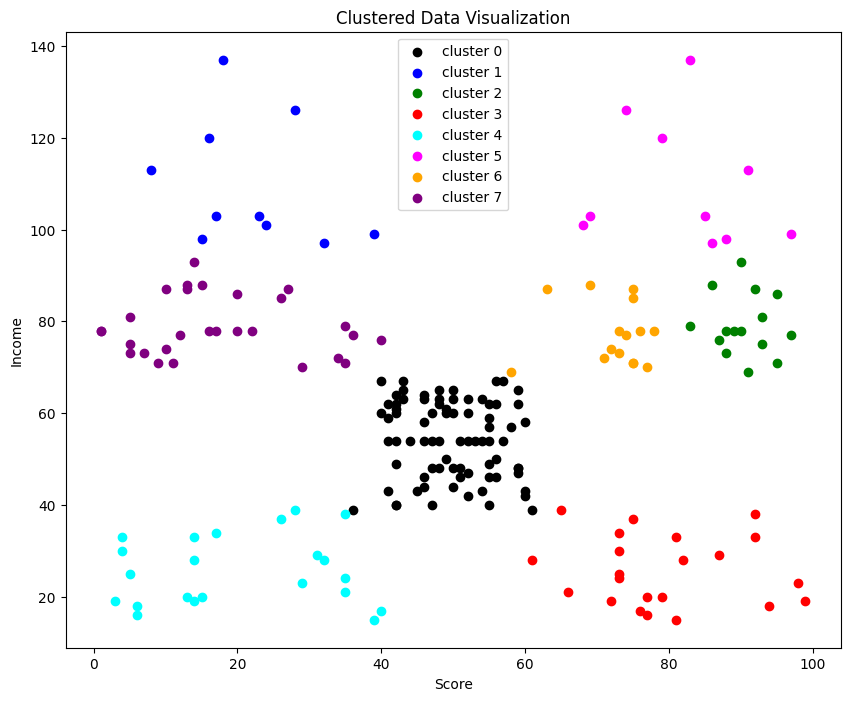

In [36]:
plt.figure(figsize=(10, 8))

plt.scatter(df0.score, df0.income, color='black', label='cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='red', label='cluster 3')
plt.scatter(df4.score, df4.income, color='cyan', label='cluster 4')
plt.scatter(df5.score, df5.income, color='magenta', label='cluster 5')
plt.scatter(df6.score, df6.income, color='orange', label='cluster 6')
plt.scatter(df7.score, df7.income, color='purple', label='cluster 7')


plt.xlabel('Score')
plt.ylabel('Income')
plt.title('Clustered Data Visualization')
plt.legend()
plt.show()

# Objective functions

In [37]:
wcss = []
cluster = range(1, 30)

for k in cluster:
    clst = KMeans(n_clusters=k)
    clst.fit(df[['score', 'income']])
    wcss.append(clst.inertia_)  #inertia calculate by wcss value. 

In [38]:
wcss

[269981.28,
 186362.95600651758,
 106348.37306211118,
 73880.64496247197,
 44448.45544793371,
 37233.81451071001,
 31898.925198412704,
 28081.012638188367,
 22131.92051101073,
 21291.290214010205,
 18250.269741820084,
 16689.26967061936,
 15464.095241033478,
 14491.907812306741,
 13690.980126849894,
 12496.78071149281,
 10578.957303223095,
 9991.370692732136,
 9725.066634535056,
 8511.518226600985,
 7939.794277291336,
 7321.18945692699,
 7180.821705660069,
 6628.888818860877,
 6197.938225556021,
 5910.910998180563,
 5677.598802919684,
 5763.782785987958,
 5223.19614625141]

In [39]:
plt.plot(range(1, 30), wcss, marker='o')

plt.xlabel('wcss value')
plt.ylabel('Number of cluster')

Text(0, 0.5, 'Number of cluster')

In [40]:
#!pip install kneed
from kneed import KneeLocator as kn 

In [41]:
kl = kn(cluster, wcss, direction='decreasing', curve='convex')

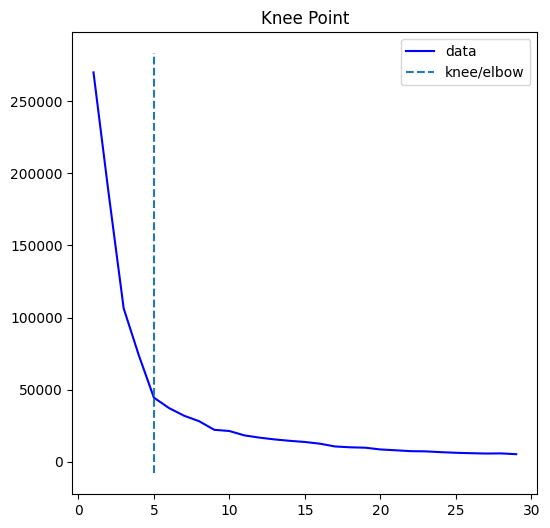

In [42]:
kl.plot_knee()
plt.show()

In [43]:
kl.knee

5

# After optimizing K-Means cluster 

In [46]:
km = KMeans(n_clusters=5)
df['defclusters'] = km.fit_predict(df[['score', 'income']])

In [47]:
df.head()

age  income  score  defclusters
0   19      15     39            3
1   21      15     81            0
2   20      16      6            3
3   23      16     77            0
4   31      17     40            3

# again separate kora lagbay.

In [48]:
centrod = km.cluster_centers_

In [49]:
centrod

array([[79.36363636, 25.72727273],
       [49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [17.11428571, 88.2       ]])

In [50]:
df0 = df[df.defclusters==0]
df1 = df[df.defclusters==1] 
df2 = df[df.defclusters==2]  
df3 = df[df.defclusters==3]   
df4 = df[df.defclusters==4]  

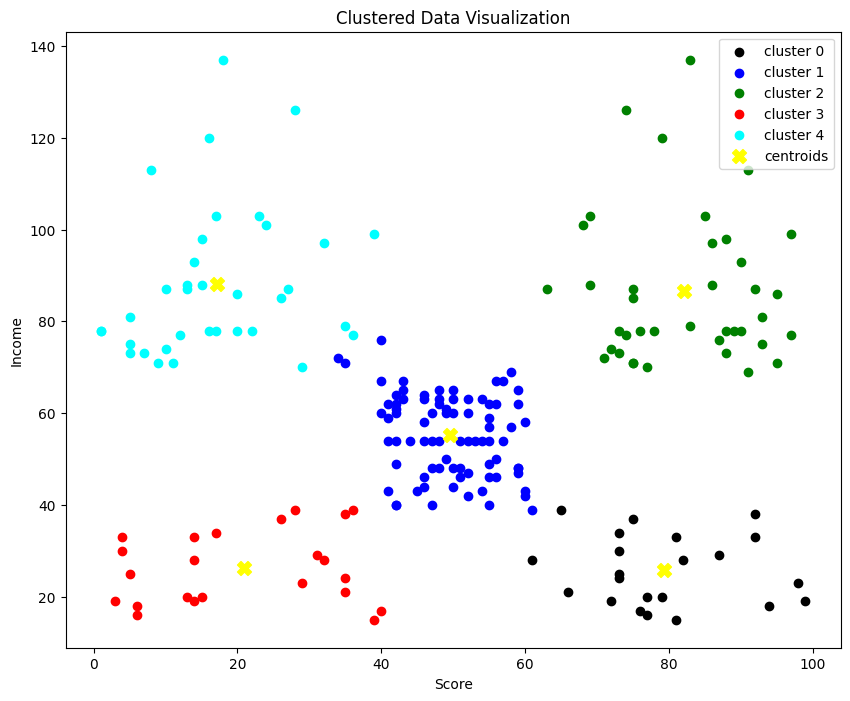

In [54]:
plt.figure(figsize=(10, 8))

plt.scatter(df0.score, df0.income, color='black', label='cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='red', label='cluster 3')
plt.scatter(df4.score, df4.income, color='cyan', label='cluster 4')


plt.scatter(centrod[:, 0], centrod[:, 1], color='yellow', label='centroids', marker='X', s=100)

plt.xlabel('Score')
plt.ylabel('Income')
plt.title('Clustered Data Visualization')
plt.legend()
plt.show()